## NC Water Budget Explorer
Using NC Water Withdrawal/Discharge/Transfer data [(link)](https://www.ncwater.org/Permits_and_Registration/Water_Withdrawal_and_Transfer_Registration/), this notebook explores water budgets at the watershed scale with the underlying objectives of revealing what we can show with this data and identify data gaps that would prove helpful

In [1]:
#Imports
import os
import pandas as pd

from ipywidgets import widgets, Layout, interact
import ipywidgets as widgets

In [3]:
#Get data
dataFolder='..\\..\\Data\\NCDEQ'
volumeFN = os.path.join(dataFolder,'MonthlyVolumeData.csv')
dfVol = pd.read_csv(volumeFN)
print(" {} records loaded".format(len(dfVol)))

#Add MGD columns for withdrawal, discharge, and transfer
dfVol['withdrawal_MGD'] = dfVol['# of DaysUsed'] * dfVol['Average DailyWithdrawal (MGD)']
dfVol['discharge_MGD'] = dfVol['# of DaysDischarged'] * dfVol['Average DailyDischarge (MGD)']
dfVol['transfer_MGD'] = dfVol['# of DaysTransferred'] * dfVol['Average DailyTransfer (MGD)']

 110208 records loaded


In [4]:
dfVol.columns

Index(['SiteID', 'Year', 'Registrant', 'Facility', 'Type', 'County',
       'Subbasin', 'Month', '# of DaysUsed', 'Average DailyWithdrawal (MGD)',
       'Maximum DayWithdrawal (MGD)', '# of DaysDischarged',
       'Average DailyDischarge (MGD)', 'Maximum DayDischarge (MGD)',
       '# of DaysTransferred', 'Average DailyTransfer (MGD)',
       'Maximum DayTransfer (MGD)', 'withdrawal_MGD', 'discharge_MGD',
       'transfer_MGD'],
      dtype='object')

In [5]:
#Function to sort on month
def sortMonth(df):
    months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    df.index = pd.CategoricalIndex(df.index,categories=months,sorted=True)
    df.sort_index(inplace=True)
    return df

In [6]:
#Group the data by year/month
grp = dfVol.groupby(['Year','Month'])
dfW = grp['withdrawal_MGD'].sum()
dfD = grp['discharge_MGD'].sum()

In [7]:
#Function for plotting monthly discharge for selected year
def plot_month(x):
    grp = dfVol.groupby(['Year','Month'])
    df = grp['Average DailyWithdrawal (MGD)','Average DailyDischarge (MGD)'].mean().xs(x)
    df = sortMonth(df)
    df.plot(kind='bar',
            subplots=False,
            figsize=(20,4),
            title="Avg daily withdrawal & discharge (MGD) for {}".format(x));
    

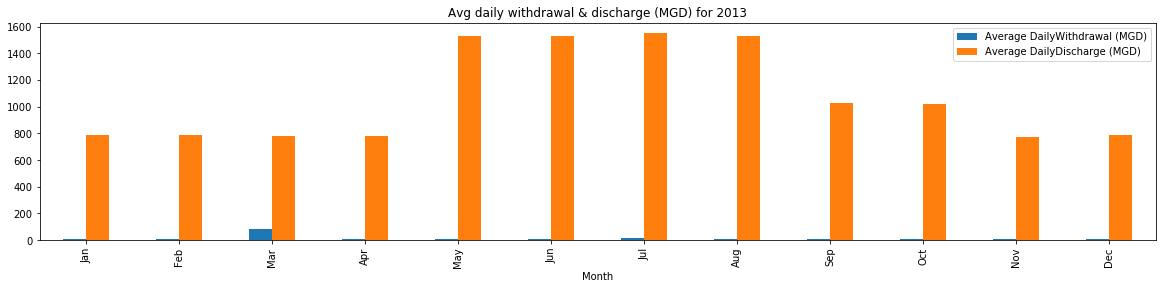

In [8]:
#Plot avg MGD by selected Month
interact(plot_month,x=widgets.IntSlider(min=2010,max=2017,step=1,description='Year'));

In [9]:
#Function for plotting monthly discharge for selected year
def plot_basin(x):
    grp = dfVol.groupby(['Subbasin','Year'])
    df = grp['withdrawal_MGD', 'discharge_MGD'].sum().xs(x)
    df.plot(kind='line',
            subplots=False,
            figsize=(20,4),
            title="Total annual withdrawal (MG)");

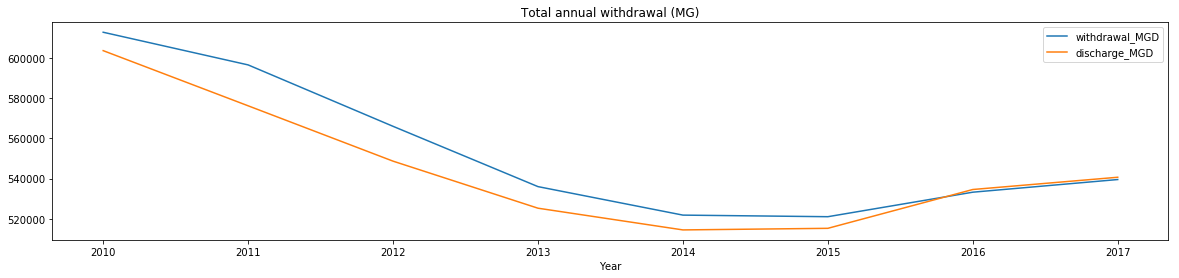

In [10]:
# Interact by basin
basinList = dfVol.Subbasin.unique().tolist()
w = widgets.Dropdown(options=basinList)
#
interact(plot_basin,x=widgets.Dropdown(options=basinList,description='Subbasin'));